In [18]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
###各データのパス###
# 訓練用データ
train_path = './competition/' + 'train' + '.csv'
# テストデータ
test_path = './competition/' + 'test' + '.csv'
# 提出用データ
submit_path = './competition/' + 'submit_sample' + '.csv'

### 1.訓練用データの確認

In [20]:
train_data = pd.read_csv(train_path)
print(train_data)
print(train_data.shape)
print(train_data.info())

         dateid      y week  soldout           name   kcal   remarks event  \
0    2014-04-01  125.0  Tue        1          メンチカツ  377.0       NaN   NaN   
1    2014-04-02   99.0  Wed        0           肉じゃが  380.0       NaN   NaN   
2    2014-04-03  100.0  Thu        1             酢豚  390.0       NaN   NaN   
3    2014-04-04   90.0  Fri        1     和風ソースハンバーグ  350.0       NaN   NaN   
4    2014-04-07  107.0  Mon        0        青梗菜牛肉炒め  387.0       NaN   NaN   
..          ...    ...  ...      ...            ...    ...       ...   ...   
332  2015-08-21  137.0  Fri        0         チキンカレー    NaN  お楽しみメニュー   NaN   
333  2015-09-01   80.0  Tue        1     自家製手作りトンカツ  423.0    弁当種類増↓   NaN   
334  2015-09-02   74.0  Wed        0       チーズメンチカツ  463.0       NaN   NaN   
335  2015-09-03   66.0  Thu        1  鶏肉黒胡椒焼きおろしソース  420.0       NaN   NaN   
336  2015-09-04   60.0  Fri        1         汁なし担担麺  435.0       NaN   NaN   

     payday       weather  precipitation  temperature  
0      

In [21]:
train_data['precipitation'].describe()

count    337.000000
mean       5.376855
std       14.342239
min        0.000000
25%        0.000000
50%        0.000000
75%        4.500000
max      123.500000
Name: precipitation, dtype: float64

In [4]:
print(train_data['dateid'].dtypes)

object


In [5]:
### object型からdatetime64[ns]
train_data['Last UpDated'] = pd.to_datetime(train_data['dateid'])

In [6]:
print(train_data['Last UpDated'])

0     2014-04-01
1     2014-04-02
2     2014-04-03
3     2014-04-04
4     2014-04-07
         ...    
332   2015-08-21
333   2015-09-01
334   2015-09-02
335   2015-09-03
336   2015-09-04
Name: Last UpDated, Length: 337, dtype: datetime64[ns]


In [7]:
#'年'の取得
train_data['year'] = train_data['Last UpDated'].dt.year
# '月'の取得
train_data['month'] = train_data['Last UpDated'].dt.month
#'日'の取得
train_data['day'] = train_data['Last UpDated'].dt.day

In [8]:
print(train_data)

         dateid      y week  soldout           name   kcal   remarks event  \
0    2014-04-01  125.0  Tue        1          メンチカツ  377.0       NaN   NaN   
1    2014-04-02   99.0  Wed        0           肉じゃが  380.0       NaN   NaN   
2    2014-04-03  100.0  Thu        1             酢豚  390.0       NaN   NaN   
3    2014-04-04   90.0  Fri        1     和風ソースハンバーグ  350.0       NaN   NaN   
4    2014-04-07  107.0  Mon        0        青梗菜牛肉炒め  387.0       NaN   NaN   
..          ...    ...  ...      ...            ...    ...       ...   ...   
332  2015-08-21  137.0  Fri        0         チキンカレー    NaN  お楽しみメニュー   NaN   
333  2015-09-01   80.0  Tue        1     自家製手作りトンカツ  423.0    弁当種類増↓   NaN   
334  2015-09-02   74.0  Wed        0       チーズメンチカツ  463.0       NaN   NaN   
335  2015-09-03   66.0  Thu        1  鶏肉黒胡椒焼きおろしソース  420.0       NaN   NaN   
336  2015-09-04   60.0  Fri        1         汁なし担担麺  435.0       NaN   NaN   

     payday       weather  precipitation  temperature Last UpDa

In [9]:
train_data = train_data.drop(['Last UpDated'],axis=1)
train_data.head()

,dateid,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,year,month,day
0,2014-04-01,125.0,Tue,1,メンチカツ,377.0,NaN,NaN,NaN,晴時々薄曇,0.0,13.9,2014,4,1
1,2014-04-02,99.0,Wed,0,肉じゃが,380.0,NaN,NaN,NaN,薄曇一時晴,0.0,15.2,2014,4,2
2,2014-04-03,100.0,Thu,1,酢豚,390.0,NaN,NaN,NaN,大雨,65.0,13.8,2014,4,3
3,2014-04-04,90.0,Fri,1,和風ソースハンバーグ,350.0,NaN,NaN,NaN,晴時々曇一時雨、雷を伴う,40.0,15.3,2014,4,4
4,2014-04-07,107.0,Mon,0,青梗菜牛肉炒め,387.0,NaN,NaN,NaN,晴後一時薄曇,0.0,11.4,2014,4,7


In [10]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dateid         337 non-null    object 
 1   y              337 non-null    float64
 2   week           337 non-null    object 
 3   soldout        337 non-null    int64  
 4   name           337 non-null    object 
 5   kcal           304 non-null    float64
 6   remarks        49 non-null     object 
 7   event          28 non-null     object 
 8   payday         17 non-null     float64
 9   weather        337 non-null    object 
 10  precipitation  337 non-null    float64
 11  temperature    337 non-null    float64
 12  year           337 non-null    int64  
 13  month          337 non-null    int64  
 14  day            337 non-null    int64  
dtypes: float64(5), int64(4), object(6)
memory usage: 39.6+ KB
None


In [15]:
print(train_data['month'].value_counts())

7     44
6     43
4     41
5     38
8     31
9     24
10    22
3     22
12    19
11    18
2     18
1     17
Name: month, dtype: int64


In [55]:
test_data['Last UpDated'] = pd.to_datetime(test_data['dateid'])

In [56]:
#'年'の取得
test_data['year'] = test_data['Last UpDated'].dt.year
# '月'の取得
test_data['month'] = test_data['Last UpDated'].dt.month
#'日'の取得
test_data['day'] = test_data['Last UpDated'].dt.day

In [59]:
print(pd.get_dummies(test_data['month']))

     1   2   3   4   5   9   11  12
0     0   0   0   0   0   1   0   0
1     0   0   0   0   0   1   0   0
2     0   0   0   0   0   1   0   0
3     0   0   0   0   0   1   0   0
4     0   0   0   0   0   1   0   0
..   ..  ..  ..  ..  ..  ..  ..  ..
139   0   0   0   0   1   0   0   0
140   0   0   0   0   1   0   0   0
141   0   0   0   0   1   0   0   0
142   0   0   0   0   1   0   0   0
143   0   0   0   0   1   0   0   0

[144 rows x 8 columns]


In [16]:
train_data.describe()

,y,soldout,kcal,payday,precipitation,temperature,year,month,day
count,337.000000,337.000000,304.000000,17.0,337.000000,337.000000,337.000000,337.000000,337.000000
mean,65.192878,0.462908,419.394737,1.0,5.376855,18.520772,2014.462908,6.376855,15.287834
std,20.645712,0.499364,25.126126,0.0,14.342239,7.708158,0.499364,2.955594,8.739123
min,25.000000,0.000000,324.000000,1.0,0.000000,2.000000,2014.000000,1.000000,1.000000
25%,53.000000,0.000000,409.750000,1.0,0.000000,12.300000,2014.000000,4.000000,8.000000
50%,62.000000,0.000000,424.000000,1.0,0.000000,20.300000,2014.000000,6.000000,16.000000
75%,72.000000,1.000000,435.000000,1.0,4.500000,24.000000,2015.000000,8.000000,23.000000
max,137.000000,1.000000,463.000000,1.0,123.500000,31.500000,2015.000000,12.000000,31.000000


In [18]:
## yが72以上
train_data[train_data['y'] >= 72]['month'].value_counts()

4     23
6     11
5     10
2      9
3      9
8      7
7      6
9      3
1      3
11     2
10     1
12     1
Name: month, dtype: int64

In [15]:
train_data['day'].value_counts()

16    13
3     13
2     13
9     13
10    13
17    13
1     12
19    12
18    12
22    12
4     12
8     12
11    11
7     11
23    11
25    11
26    11
20    11
12    11
15    10
6     10
27    10
30    10
28    10
24    10
21    10
13     9
14     9
29     9
5      9
31     4
Name: day, dtype: int64

In [17]:
train_data.groupby('day').sum()

,y,soldout,kcal,payday,precipitation,temperature,year,month
day,,,,,,,,
1,802.0,7,4937.0,0.0,106.0,248.3,24173,86
2,844.0,6,5509.0,0.0,8.0,243.0,26188,84
3,809.0,7,5073.0,0.0,152.5,247.3,26189,87
4,772.0,7,4629.0,0.0,82.5,234.5,24173,85
5,522.0,7,3367.0,0.0,54.0,164.5,18130,65
6,599.0,8,3806.0,0.0,270.0,180.1,20146,60
7,864.0,4,3768.0,0.0,11.5,206.2,22159,70
8,896.0,4,4094.0,2.0,33.5,213.7,24173,78
9,805.0,7,5492.0,2.0,83.5,197.7,26188,76


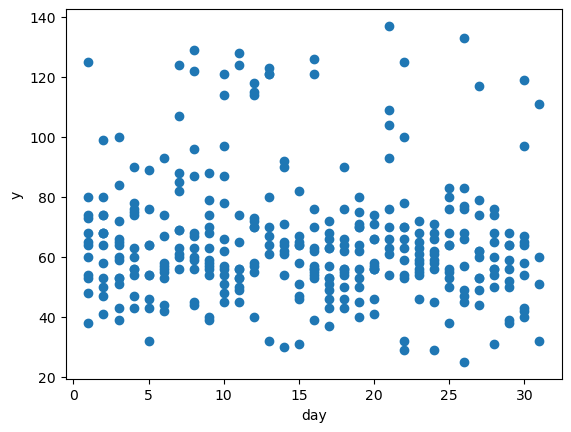

In [14]:
plt.scatter(train_data['day'],train_data['y'])
plt.xlabel('day')
plt.ylabel('y')
plt.show()

#### 天気の情報を確認

In [37]:
## 訓練用データについて
print(train_data['weather'].value_counts())

晴                 51
快晴                32
曇                 23
薄曇                22
曇時々雨              13
                  ..
曇一時晴後時々雨           1
晴後一時雨、雷を伴う         1
晴後一時雨、雷・ひょうを伴う     1
雨後曇一時晴             1
曇時々雨後晴             1
Name: weather, Length: 62, dtype: int64


In [20]:
### テスト用データについて
test_data = pd.read_csv(test_path)

In [36]:
print(test_data['weather'].value_counts())

快晴               18
晴                13
曇                12
晴一時曇              7
曇一時晴              6
曇一時雨              5
晴後薄曇              5
曇後一時晴             4
晴一時薄曇             4
曇時々雨              4
雨後曇               3
曇後晴               3
雨時々曇              3
曇時々晴              3
曇後雨               3
薄曇一時晴             3
晴時々曇              3
晴後一時薄曇            3
雨一時曇              3
晴後曇               3
曇後一時雨             2
雨後時々曇             2
薄曇時々晴             2
晴後時々曇             2
薄曇後晴              2
大雨後一時曇            2
曇後時々雨             2
雨                 2
晴時々薄曇             2
大雨                2
晴後一時曇             2
曇時々雨一時晴           1
大雨、雷を伴う           1
薄曇                1
晴後雨時々曇            1
曇一時雨後一時晴          1
雨後一時曇             1
曇一時晴後時々雨          1
大雨後時々晴、みぞれを伴う     1
雨一時みぞれ後時々曇        1
雨後時々曇、雷を伴う        1
曇後時々晴             1
大雨後晴時々曇           1
大雨時々曇             1
薄曇後時々晴            1
Name: weather, dtype: int64


### イベント

In [38]:
train_data['remarks'].value_counts()

お楽しみメニュー          28
料理長のこだわりメニュー       7
コンビニ改装             4
料理長イチオシ！           2
今月のイチオシ!           2
今月のこだわりメニュー        2
スペシャルメニュー          1
近隣に飲食店複合ビルオープン     1
料理長イチオシ!           1
弁当種類増↓             1
Name: remarks, dtype: int64

In [39]:
test_data['remarks'].value_counts()

お楽しみメニュー       15
人気のおすすめメニュー     1
Name: remarks, dtype: int64

### 特記事項

In [40]:
train_data['event'].value_counts()

ママの会             14
キャリアアップ支援セミナー    14
Name: event, dtype: int64

In [41]:
test_data['event'].value_counts()

ママの会             8
キャリアアップ支援セミナー    6
Name: event, dtype: int64

### メインメニューに関して

In [49]:
a = train_data['name'].value_counts()
print(a)

メンチカツ          9
タンドリーチキン       7
カレーライス         6
親子煮            6
豚キムチ炒め         6
              ..
鶏肉の山賊焼き        1
ハンバーグデミソース     1
ぶりレモンペッパー焼き    1
チキンフリカッセ       1
汁なし担担麺         1
Name: name, Length: 213, dtype: int64


In [43]:
test_data['name'].value_counts()

チキンカレー             7
ポークカレー             7
鶏肉の唐揚げ             5
酢豚                 4
油淋鶏                4
                  ..
えびフライ×2本           1
おろしハンバーグソースと       1
チキンのガーリックバターソース    1
焼き肉ビビンバ            1
ぶり照り焼き・根菜添え        1
Name: name, Length: 106, dtype: int64

C:\Users\baba\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12513 (\N{KATAKANA LETTER ME}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\baba\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\baba\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12481 (\N{KATAKANA LETTER TI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\baba\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12459 (\N{KATAKANA LETTER KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\baba\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\baba\anaconda3\lib\site-pac

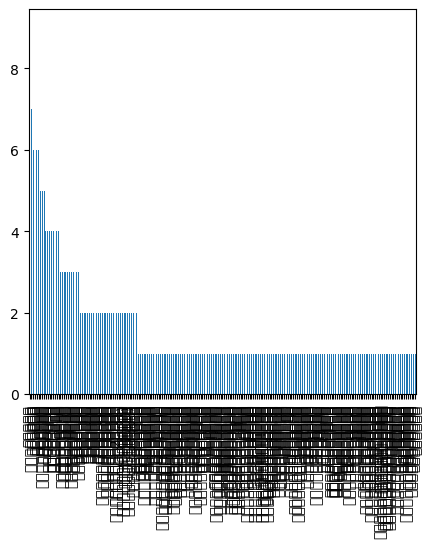

In [60]:
plt.figure(figsize = (5,5))
counts = train_data['name'].value_counts()
counts.plot.bar()
plt.show()

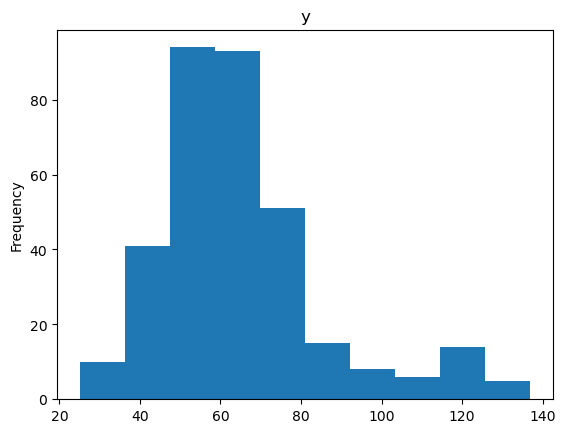

In [149]:
### y(販売数)のデータ分布を確認→yが目的変数
y_var = train_data['y']
y_var.plot.hist(title = 'y')
plt.show()

In [150]:
print(y_var.describe())

count    337.000000
mean      65.192878
std       20.645712
min       25.000000
25%       53.000000
50%       62.000000
75%       72.000000
max      137.000000
Name: y, dtype: float64


In [151]:
### 欠損値の確認(kcal:33，remarks:288, event:309, payday:320)→4つのcolumnの欠損値が確認できた
print(train_data.isnull().sum())

dateid             0
y                  0
week               0
soldout            0
name               0
kcal              33
remarks          288
event            309
payday           320
weather            0
precipitation      0
temperature        0
dtype: int64


In [152]:
## kcal(float64)の欠損値→　①平均値で補完する、②前後の値を比較して補完する
print(train_data['kcal'].value_counts())
print('--------------------------------')
### remarks(objects)の欠損値　→　'特になし'で補完する(一応)
print(train_data['remarks'].value_counts())
print('--------------------------------')
## event(objects)の欠損値　→　'特になし'で補完する
print(train_data['event'].value_counts())
print('--------------------------------')
## payday(float64)の欠損値　→　給料日の以外は0.0とする
print(train_data['payday'].value_counts())

420.0    27
430.0    21
435.0    13
450.0    13
400.0    13
         ..
388.0     1
324.0     1
401.0     1
355.0     1
463.0     1
Name: kcal, Length: 81, dtype: int64
--------------------------------
お楽しみメニュー          28
料理長のこだわりメニュー       7
コンビニ改装             4
料理長イチオシ！           2
今月のイチオシ!           2
今月のこだわりメニュー        2
スペシャルメニュー          1
近隣に飲食店複合ビルオープン     1
料理長イチオシ!           1
弁当種類増↓             1
Name: remarks, dtype: int64
--------------------------------
ママの会             14
キャリアアップ支援セミナー    14
Name: event, dtype: int64
--------------------------------
1.0    17
Name: payday, dtype: int64


### 2.欠損値の補完および削除

In [153]:
print(train_data.describe())

                y     soldout        kcal  payday  precipitation  temperature
count  337.000000  337.000000  304.000000    17.0     337.000000   337.000000
mean    65.192878    0.462908  419.394737     1.0       5.376855    18.520772
std     20.645712    0.499364   25.126126     0.0      14.342239     7.708158
min     25.000000    0.000000  324.000000     1.0       0.000000     2.000000
25%     53.000000    0.000000  409.750000     1.0       0.000000    12.300000
50%     62.000000    0.000000  424.000000     1.0       0.000000    20.300000
75%     72.000000    1.000000  435.000000     1.0       4.500000    24.000000
max    137.000000    1.000000  463.000000     1.0     123.500000    31.500000


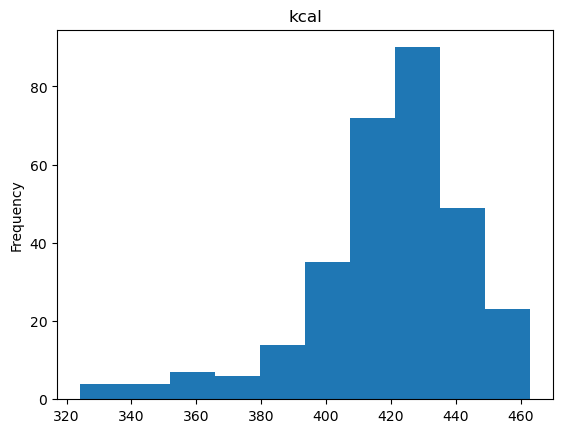

In [154]:
### 'kcal'のデータ分布確認→平均，中央値あたりの分布が多い→'kcal'の欠損値は平均値で補完
kcal_var = train_data['kcal']
kcal_var.plot.hist(title = 'kcal')
plt.show()

In [51]:
### 訓練用データの欠損値の補完(バージョン1)
train_data['kcal_h'] = train_data['kcal'].fillna(method = 'ffill')
train_data = train_data.fillna({'payday': 0.0, 'remarks':'特になし', 'event' : '特になし'})

In [434]:
print(train_data)

         dateid      y week  soldout           name   kcal   remarks event  \
0    2014-04-01  125.0  Tue        1          メンチカツ  377.0      特になし  特になし   
1    2014-04-02   99.0  Wed        0           肉じゃが  380.0      特になし  特になし   
2    2014-04-03  100.0  Thu        1             酢豚  390.0      特になし  特になし   
3    2014-04-04   90.0  Fri        1     和風ソースハンバーグ  350.0      特になし  特になし   
4    2014-04-07  107.0  Mon        0        青梗菜牛肉炒め  387.0      特になし  特になし   
..          ...    ...  ...      ...            ...    ...       ...   ...   
332  2015-08-21  137.0  Fri        0         チキンカレー    NaN  お楽しみメニュー  特になし   
333  2015-09-01   80.0  Tue        1     自家製手作りトンカツ  423.0    弁当種類増↓  特になし   
334  2015-09-02   74.0  Wed        0       チーズメンチカツ  463.0      特になし  特になし   
335  2015-09-03   66.0  Thu        1  鶏肉黒胡椒焼きおろしソース  420.0      特になし  特になし   
336  2015-09-04   60.0  Fri        1         汁なし担担麺  435.0      特になし  特になし   

     payday       weather  precipitation  temperature  kcal_h  

In [157]:
print(train_data)

         dateid      y week  soldout           name   kcal   remarks event  \
0    2014-04-01  125.0  Tue        1          メンチカツ  377.0      特になし  特になし   
1    2014-04-02   99.0  Wed        0           肉じゃが  380.0      特になし  特になし   
2    2014-04-03  100.0  Thu        1             酢豚  390.0      特になし  特になし   
3    2014-04-04   90.0  Fri        1     和風ソースハンバーグ  350.0      特になし  特になし   
4    2014-04-07  107.0  Mon        0        青梗菜牛肉炒め  387.0      特になし  特になし   
..          ...    ...  ...      ...            ...    ...       ...   ...   
332  2015-08-21  137.0  Fri        0         チキンカレー    NaN  お楽しみメニュー  特になし   
333  2015-09-01   80.0  Tue        1     自家製手作りトンカツ  423.0    弁当種類増↓  特になし   
334  2015-09-02   74.0  Wed        0       チーズメンチカツ  463.0      特になし  特になし   
335  2015-09-03   66.0  Thu        1  鶏肉黒胡椒焼きおろしソース  420.0      特になし  特になし   
336  2015-09-04   60.0  Fri        1         汁なし担担麺  435.0      特になし  特になし   

     payday       weather  precipitation  temperature  kcal_h  

In [158]:
print(train_data.isnull().sum())

dateid            0
y                 0
week              0
soldout           0
name              0
kcal             33
remarks           0
event             0
payday            0
weather           0
precipitation     0
temperature       0
kcal_h            0
dtype: int64


### 3.量的データ間の相関を確認

#### 日付と販売数(目的変数)の関係→　相関はありそう(4月から9月まであるので、グルーピングして値を求めて比較するのもよさそう)

In [159]:
print(train_data['dateid'].values.astype(str).shape)
print(train_data['dateid'].values.astype(str)[0:7])

(337,)
['2014-04-01' '2014-04-02' '2014-04-03' '2014-04-04' '2014-04-07'
 '2014-04-08' '2014-04-09']


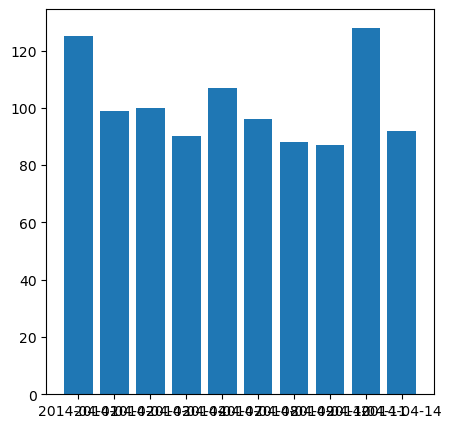

In [160]:
plt.figure(figsize = (5,5))
X = train_data['dateid'].values.astype(str)[:10]
Y = train_data['y'].values[:10]
plt.bar(X,Y)
plt.show()

In [161]:
# 相関係数の算出
print(train_data.corr())

                      y   soldout      kcal    payday  precipitation  \
y              1.000000 -0.041884 -0.055984  0.115569       0.079831   
soldout       -0.041884  1.000000  0.054086 -0.078024       0.100651   
kcal          -0.055984  0.054086  1.000000  0.004891       0.013642   
payday         0.115569 -0.078024  0.004891  1.000000       0.010029   
precipitation  0.079831  0.100651  0.013642  0.010029       1.000000   
temperature   -0.063523 -0.037300 -0.209328 -0.016124      -0.018038   
kcal_h        -0.041236  0.043685  1.000000  0.018531       0.018809   

               temperature    kcal_h  
y                -0.063523 -0.041236  
soldout          -0.037300  0.043685  
kcal             -0.209328  1.000000  
payday           -0.016124  0.018531  
precipitation    -0.018038  0.018809  
temperature       1.000000 -0.190540  
kcal_h           -0.190540  1.000000  


#### 3-1 降水量と販売数(目的変数)の関係  →　散布図で確認する

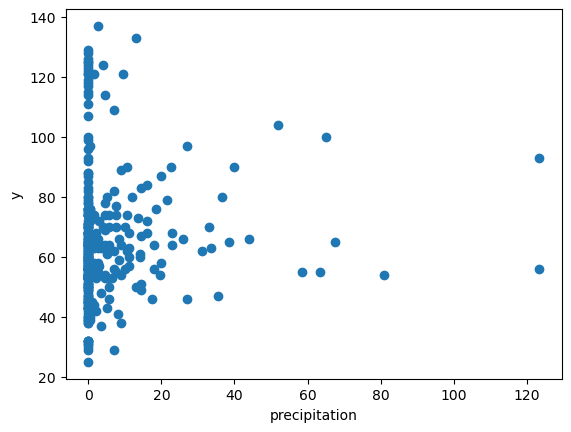

In [162]:
### 降水量のデータは考慮しなくてもいいかも
plt.scatter(train_data['precipitation'],train_data['y'])
plt.xlabel('precipitation')
plt.ylabel('y')
plt.show()

#### 3-2 気温と販売数(目的変数)の関係  →　散布図で確認する

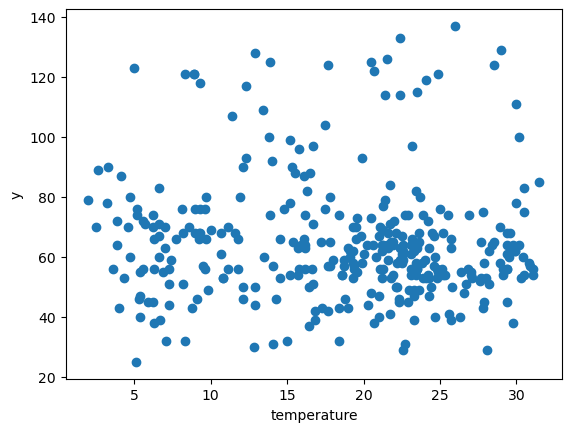

In [163]:
### 気温と販売数の関係→　なにかしら関係がありそう
plt.scatter(train_data['temperature'],train_data['y'])
plt.xlabel('temperature')
plt.ylabel('y')
plt.show()

#### 3-3 降水量のデータ分布を可視化　→　外れ値が存在

<AxesSubplot:title={'center':'precipitation'}, ylabel='Frequency'>

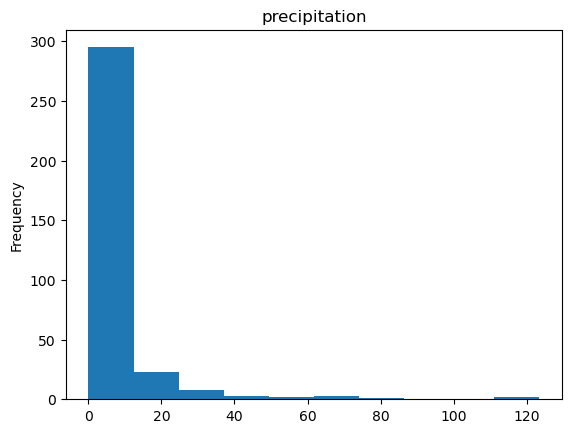

In [164]:
precipitation_var = train_data['precipitation']
precipitation_var.plot.hist(title = 'precipitation')

#### 3-4 気温のデータ分布を可視化

In [22]:
train_data['temperature'].describe()

count    337.000000
mean      18.520772
std        7.708158
min        2.000000
25%       12.300000
50%       20.300000
75%       24.000000
max       31.500000
Name: temperature, dtype: float64

<AxesSubplot:title={'center':'temperature'}, ylabel='Frequency'>

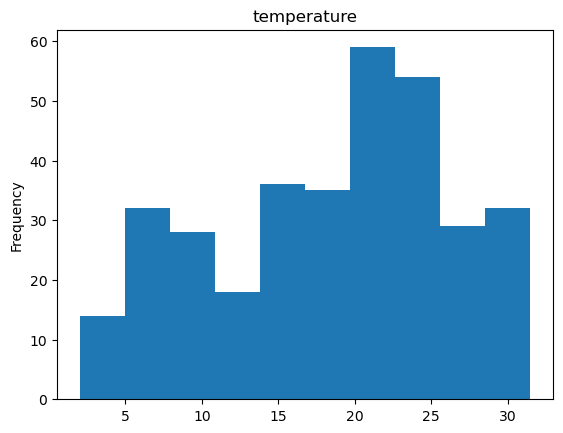

In [165]:
temperature_var = train_data['temperature']
temperature_var.plot.hist(title = 'temperature')

#### 3-5 おかずのカロリーと販売数の関係

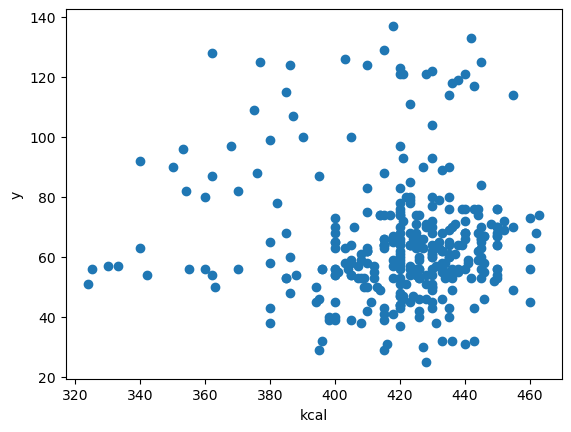

In [53]:
plt.scatter(train_data['kcal_h'],train_data['y'])
plt.xlabel('kcal')
plt.ylabel('y')
plt.show()

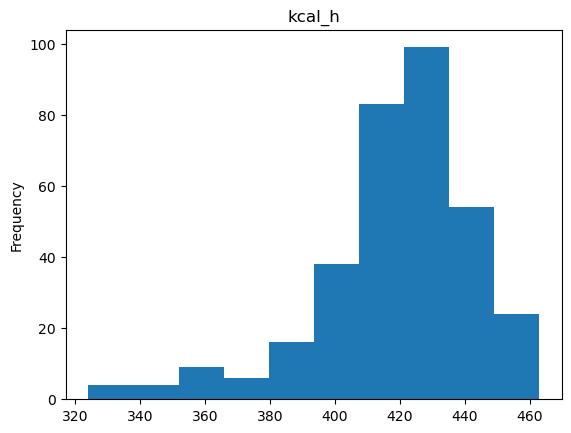

In [99]:
kcal_h_var = train_data['kcal_h']
kcal_h_var.plot.hist(title = 'kcal_h')
plt.show()

#### 給料日フラグと販売量の関係(棒グラフ)

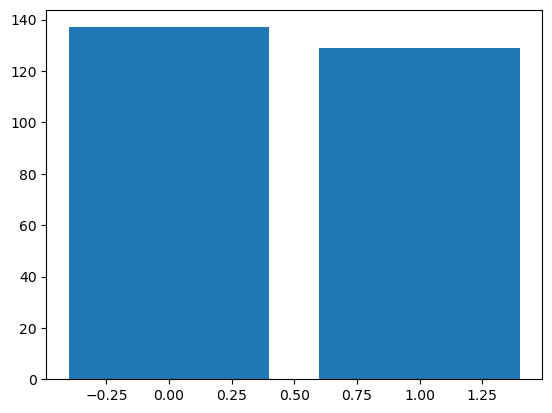

In [112]:
X = train_data['payday'].values
Y = train_data['y'].values
plt.bar(X,Y)
plt.show()

In [168]:
train_data.corr()

,y,soldout,kcal,payday,precipitation,temperature,kcal_h
y,1.000000,-0.041884,-0.055984,0.115569,0.079831,-0.063523,-0.041236
soldout,-0.041884,1.000000,0.054086,-0.078024,0.100651,-0.037300,0.043685
kcal,-0.055984,0.054086,1.000000,0.004891,0.013642,-0.209328,1.000000
payday,0.115569,-0.078024,0.004891,1.000000,0.010029,-0.016124,0.018531
precipitation,0.079831,0.100651,0.013642,0.010029,1.000000,-0.018038,0.018809
temperature,-0.063523,-0.037300,-0.209328,-0.016124,-0.018038,1.000000,-0.190540
kcal_h,-0.041236,0.043685,1.000000,0.018531,0.018809,-0.190540,1.000000


### 4.質的データとの相関関係

### 箱ひげ図による確認

In [62]:
import seaborn as sns

### 曜日と販売数の関係

C:\Users\baba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='week', ylabel='y'>

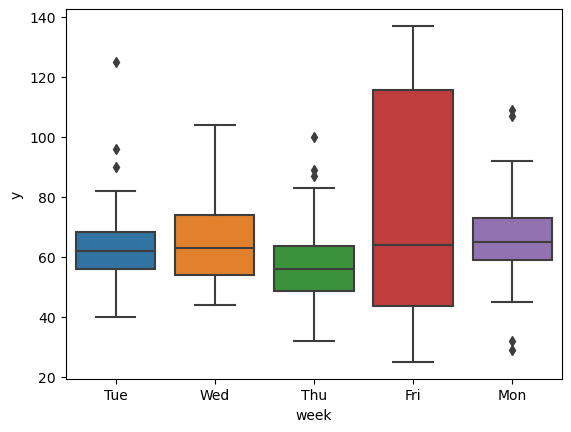

In [103]:
sns.boxplot('week','y', data = train_data)

### 天気と販売数の関係

C:\Users\baba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weather', ylabel='y'>

C:\Users\baba\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26228 (\N{CJK UNIFIED IDEOGRAPH-6674}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\baba\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\baba\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12293 (\N{IDEOGRAPHIC ITERATION MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\baba\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 34180 (\N{CJK UNIFIED IDEOGRAPH-8584}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\baba\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26311 (\N{CJK UNIFIED IDEOGRAPH-66C7}) missing from current font.
  fig.canvas.print_figure(bytes_io, *

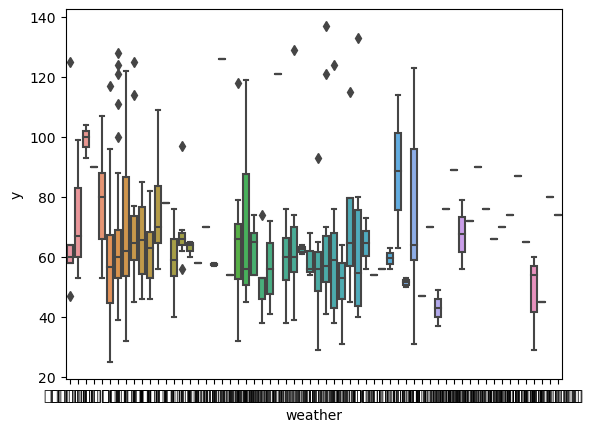

In [169]:
#### データ数が多すぎるので、学習には用いない(仮) →　データを加工する必要がある
sns.boxplot('weather','y', data = train_data)

### メインメニューと販売数の関係

C:\Users\baba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\baba\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12513 (\N{KATAKANA LETTER ME}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\baba\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\baba\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12481 (\N{KATAKANA LETTER TI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\baba\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 1245

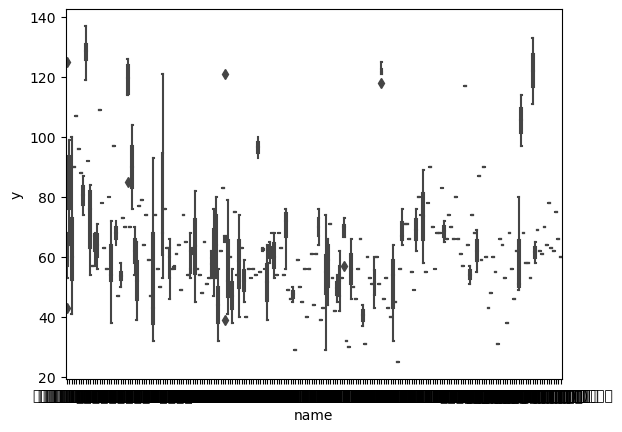

In [63]:
counts = train_data['name'].value_counts()
#counts.plot.bar()
sns.boxplot('name','y', data = train_data)
plt.show()

### 特記事項と販売数の関係

C:\Users\baba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='remarks', ylabel='y'>

C:\Users\baba\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\baba\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12395 (\N{HIRAGANA LETTER NI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\baba\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12394 (\N{HIRAGANA LETTER NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\baba\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12375 (\N{HIRAGANA LETTER SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\baba\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12362 (\N{HIRAGANA LETTER O}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\baba\anaconda3\lib\

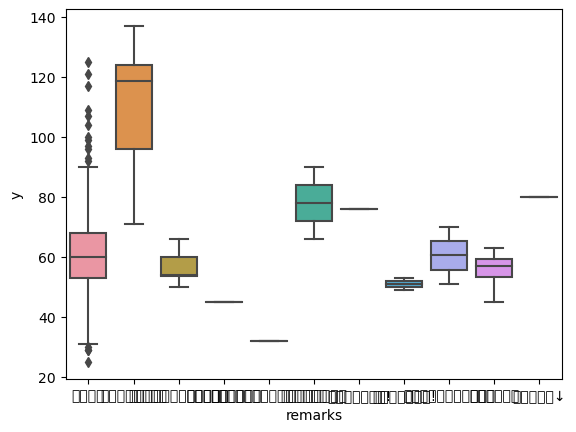

In [109]:
sns.boxplot('remarks','y', data = train_data)

### 社内イベントと販売数の関係

C:\Users\baba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\baba\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\baba\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12395 (\N{HIRAGANA LETTER NI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\baba\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12394 (\N{HIRAGANA LETTER NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\baba\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: G

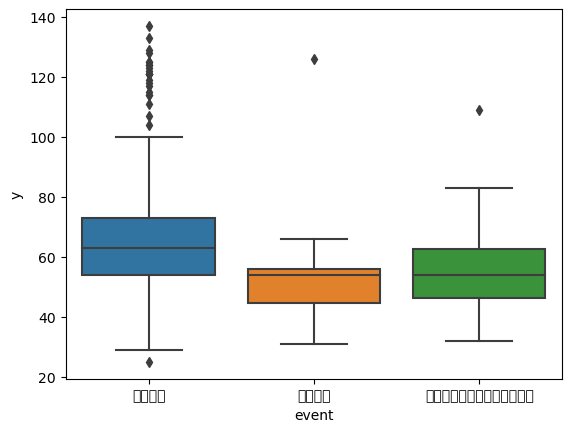

In [111]:
sns.boxplot('event','y', data = train_data)
plt.show()

## データの前処理

In [444]:
print(train_data)

         dateid      y week  soldout           name   kcal   remarks event  \
0    2014-04-01  125.0  Tue        1          メンチカツ  377.0      特になし  特になし   
1    2014-04-02   99.0  Wed        0           肉じゃが  380.0      特になし  特になし   
2    2014-04-03  100.0  Thu        1             酢豚  390.0      特になし  特になし   
3    2014-04-04   90.0  Fri        1     和風ソースハンバーグ  350.0      特になし  特になし   
4    2014-04-07  107.0  Mon        0        青梗菜牛肉炒め  387.0      特になし  特になし   
..          ...    ...  ...      ...            ...    ...       ...   ...   
332  2015-08-21  137.0  Fri        0         チキンカレー    NaN  お楽しみメニュー  特になし   
333  2015-09-01   80.0  Tue        1     自家製手作りトンカツ  423.0    弁当種類増↓  特になし   
334  2015-09-02   74.0  Wed        0       チーズメンチカツ  463.0      特になし  特になし   
335  2015-09-03   66.0  Thu        1  鶏肉黒胡椒焼きおろしソース  420.0      特になし  特になし   
336  2015-09-04   60.0  Fri        1         汁なし担担麺  435.0      特になし  特になし   

     payday       weather  precipitation  temperature  kcal_h  

In [475]:
X = train_data[:139]

In [476]:
print(X)

         dateid      y week  soldout        name   kcal   remarks event  \
0    2014-04-01  125.0  Tue        1       メンチカツ  377.0      特になし  特になし   
1    2014-04-02   99.0  Wed        0        肉じゃが  380.0      特になし  特になし   
2    2014-04-03  100.0  Thu        1          酢豚  390.0      特になし  特になし   
3    2014-04-04   90.0  Fri        1  和風ソースハンバーグ  350.0      特になし  特になし   
4    2014-04-07  107.0  Mon        0     青梗菜牛肉炒め  387.0      特になし  特になし   
..          ...    ...  ...      ...         ...    ...       ...   ...   
134  2014-10-20   56.0  Mon        1         豚柳川  426.0      特になし  特になし   
135  2014-10-21   63.0  Tue        0     ポーク生姜焼き  410.0      特になし  特になし   
136  2014-10-22   66.0  Wed        1        麻婆豆腐  415.0      特になし  特になし   
137  2014-10-23   46.0  Thu        1   ビーフストロガノフ  428.0      特になし  特になし   
138  2014-10-24   71.0  Fri        0        唐揚げ丼    NaN  お楽しみメニュー  特になし   

     payday       weather  precipitation  temperature  kcal_h  
0       0.0         晴時々薄曇          

In [477]:
X = X.drop(['y','kcal','payday'],axis = 1)

In [478]:
print(X)

         dateid week  soldout        name   remarks event       weather  \
0    2014-04-01  Tue        1       メンチカツ      特になし  特になし         晴時々薄曇   
1    2014-04-02  Wed        0        肉じゃが      特になし  特になし         薄曇一時晴   
2    2014-04-03  Thu        1          酢豚      特になし  特になし            大雨   
3    2014-04-04  Fri        1  和風ソースハンバーグ      特になし  特になし  晴時々曇一時雨、雷を伴う   
4    2014-04-07  Mon        0     青梗菜牛肉炒め      特になし  特になし        晴後一時薄曇   
..          ...  ...      ...         ...       ...   ...           ...   
134  2014-10-20  Mon        1         豚柳川      特になし  特になし        晴後曇一時雨   
135  2014-10-21  Tue        0     ポーク生姜焼き      特になし  特になし           雨後曇   
136  2014-10-22  Wed        1        麻婆豆腐      特になし  特になし             雨   
137  2014-10-23  Thu        1   ビーフストロガノフ      特になし  特になし          雨時々曇   
138  2014-10-24  Fri        0        唐揚げ丼  お楽しみメニュー  特になし          晴一時曇   

     precipitation  temperature  kcal_h  
0              0.0         13.9   377.0  
1              

In [479]:
# ダミー変数化(質的データ)
X = pd.get_dummies(X)

In [480]:
print(X)

     soldout  precipitation  temperature  kcal_h  dateid_2014-04-01  \
0          1            0.0         13.9   377.0                  1   
1          0            0.0         15.2   380.0                  0   
2          1           65.0         13.8   390.0                  0   
3          1           40.0         15.3   350.0                  0   
4          0            0.0         11.4   387.0                  0   
..       ...            ...          ...     ...                ...   
134        1            0.0         19.4   426.0                  0   
135        0            1.0         19.0   410.0                  0   
136        1           26.0         16.1   415.0                  0   
137        1            5.5         14.3   428.0                  0   
138        0            0.0         16.7   428.0                  0   

     dateid_2014-04-02  dateid_2014-04-03  dateid_2014-04-04  \
0                    0                  0                  0   
1                  

In [424]:
y = train_data['y']
print(y)

0      125.0
1       99.0
2      100.0
3       90.0
4      107.0
       ...  
332    137.0
333     80.0
334     74.0
335     66.0
336     60.0
Name: y, Length: 337, dtype: float64


In [425]:
X = X.values
y = y.values

In [426]:
from sklearn.model_selection import train_test_split

In [427]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=43)

In [428]:
from sklearn.linear_model import LinearRegression as LR

In [429]:
model = LR()
model.fit(X_train,y_train)

LinearRegression()

In [430]:
from sklearn.metrics import mean_squared_error as MSE

In [431]:
#予測値の算出
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
#MSEの算出
mse_train = MSE(y_train, y_pred_train)
mse_test = MSE(y_test, y_pred_test)
#RMSEの算出
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
#RMSEの表示
print(rmse_train)
print(rmse_test)

4.684516495619741
254032053976.7312


In [391]:
from sklearn.ensemble import RandomForestRegressor

In [392]:
params = {"n_estimators": [10, 50,100, 300, 500,1000], 
          "max_depth": [3,5,10,15, 20,None], 
          "max_features": ["sqrt", "log2",None]}

In [393]:
from sklearn.model_selection import GridSearchCV

In [394]:
model2 = RandomForestRegressor(random_state = 30)

In [395]:
model3 = GridSearchCV(model2, params,scoring="neg_mean_squared_error")

In [396]:
model3.fit(X_train[:144],y_train[:144])
print(model3.best_params_)

{'max_depth': 15, 'max_features': None, 'n_estimators': 50}


In [397]:
forest = model3.best_estimator_

In [398]:
#予測値の算出
y_pred_train = forest.predict(X_train)
y_pred_test = forest.predict(X_test)
#MSEの算出
mse_train = MSE(y_train, y_pred_train)
mse_test = MSE(y_test, y_pred_test)
#RMSEの算出
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
#RMSEの表示
print(rmse_train)
print(rmse_test)

11.212415300377447
14.176209589113345


#### 評価データの読み込み

In [325]:
test_data = pd.read_csv(test_path)
print(test_data)

         dateid week  soldout            name   kcal   remarks event  payday  \
0    2015-09-07  Mon        0       豚肉の柚子胡椒炒め  428.0       NaN   NaN     NaN   
1    2015-09-08  Tue        0         鶏肉の塩麹焼き  420.0       NaN   NaN     NaN   
2    2015-09-09  Wed        0       サバの味醂干し焼き  456.0       NaN   NaN     NaN   
3    2015-09-10  Thu        1            塩唐揚げ  439.0       NaN   NaN     1.0   
4    2015-09-11  Fri        0  カレーライス(ポークカレー)    NaN  お楽しみメニュー   NaN     NaN   
..          ...  ...      ...             ...    ...       ...   ...     ...   
139  2016-05-19  Thu        1        豚肉ザーサイ豆腐  490.0       NaN   NaN     NaN   
140  2016-05-20  Fri        1          キーマカレー  485.0       NaN  ママの会     NaN   
141  2016-05-23  Mon        0         鶏肉の照り焼き  505.0       NaN   NaN     NaN   
142  2016-05-24  Tue        1         海鮮チリソース  485.0       NaN   NaN     NaN   
143  2016-05-25  Wed        0     ぶり照り焼き・根菜添え  508.0       NaN   NaN     NaN   

     weather  precipitation  temperatur

In [326]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dateid         144 non-null    object 
 1   week           144 non-null    object 
 2   soldout        144 non-null    int64  
 3   name           144 non-null    object 
 4   kcal           128 non-null    float64
 5   remarks        16 non-null     object 
 6   event          14 non-null     object 
 7   payday         8 non-null      float64
 8   weather        144 non-null    object 
 9   precipitation  144 non-null    float64
 10  temperature    144 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 12.5+ KB
None


In [327]:
test_data['kcal_h'] = test_data['kcal'].fillna(method = 'ffill')
test_data = test_data.drop(['kcal','payday'],axis = 1)

In [330]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dateid         144 non-null    object 
 1   week           144 non-null    object 
 2   soldout        144 non-null    int64  
 3   name           144 non-null    object 
 4   remarks        144 non-null    object 
 5   event          144 non-null    object 
 6   weather        144 non-null    object 
 7   precipitation  144 non-null    float64
 8   temperature    144 non-null    float64
 9   kcal_h         144 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 11.4+ KB
None


In [329]:
test_data = test_data.fillna({'remarks':'特になし', 'event' : '特になし'})

In [331]:
# ダミー変数化(質的データ)
test_data = pd.get_dummies(test_data)

In [418]:
print(test_data.columns)

Index(['dateid', 'week', 'soldout', 'name', 'kcal', 'remarks', 'event',
       'payday', 'weather', 'precipitation', 'temperature'],
      dtype='object')


In [332]:
test = test_data.values